In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spatialdata_io
import spatialdata as sd

# while not pip installable, add path to file 
import sys 
sys.path.append("../../src")
import troutpy 

/home/sergio/.local/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/sergio/.local/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/sergio/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/sergio/.local/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
xenium_path_cropped='/media/sergio/Discovair_final/mousebrain_prime_crop_quantified.zarr'
output_path='/media/sergio/Discovair_final/analysis_crop'
sdata=sd.read_zarr(xenium_path_cropped)

/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/

## Identify source cell

In [ ]:
troutpy.tl.compute_source_cells(sdata, expression_threshold=0)

/home/sergio/Jnotebooks/exRNA/spatial_exotranscriptomics/notebooks/spatial_data_tutorials/../../exrna/tl/source_cell.py:141: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sdata['xrna_metadata'].varm['source'] = outtable.join(proportions).to_numpy()


In [ ]:
# work on visualization
#filtered_proportions = source_proportion[(source_proportion > 0.1).any(axis=1)]
#absent_source_proportions = source_proportion[np.max(source_proportion,axis=1)<0.1]
#troutpy.pl.sorted_heatmap(source_proportion, output_path,filename="Heatmap_source_cells_by_gene.pdf",cmap='Blues',vmax=0.2)
#troutpy.pl.sorted_heatmap(absent_source_proportions, output_path,filename="Heatmap_source_cells_by_gene.pdf",cmap='Blues',vmax=1,figsize=(4,3))

### Compute distance to source cell

In [ ]:
troutpy.tl.distance_to_source_cell(sdata, xcellcoord='x_centroid', ycellcoord='y_centroid',gene_id_column='feature_name')

 41%|████      | 1726/4226 [00:17<00:23, 105.83it/s]

In [ ]:
troutpy.tl.compute_distant_cells_prop(sdata, layer='transcripts', gene_id_column='feature_name', threshold=30,copy=False)

/home/sergio/Jnotebooks/exRNA/spatial_exotranscriptomics/notebooks/spatial_data_tutorials/../../exrna/tl/source_cell.py:241: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions_above_threshold = (data.groupby(gene_id_column)['distance_to_source_cell']


In [ ]:
## work on plotting
#troutpy.pl.proportion_above_threshold(proportions_above_threshold, top_percentile=0.01, bottom_percentile=0.01, figsize=(5, 10), bar_color="orange",save=True,output_path=output_path)

## Identify target cells

In [ ]:
# Calculate closest cells and distances
troutpy.tl.calculate_target_cells(sdata, layer='transcripts', xcoord='x', 
ycoord='y',xcellcoord='x_centroid',ycellcoord='y_centroid',celltype_key='cell type',copy=False)

Calculating closest cells: 100%|██████████| 5132696/5132696 [02:31<00:00, 33814.16it/s]
/home/sergio/.local/lib/python3.10/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/home/sergio/Jnotebooks/exRNA/spatial_exotranscriptomics/notebooks/spatial_data_tutorials/../../exrna/tl/target_cell.py:105: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  sdata['xrna_metadata'].varm['target'] = outtable.join(celltype_by_feature).to_numpy()


In [ ]:
### work on plotting 
##troutpy.pl.sorted_heatmap(target_proportion, output_path,filename="Heatmap_target_cells_by_gene.pdf",cmap='Reds',vmax=1)
#troutpy.pl.coupled_scatter(sdata,layer='extracellular_transcripts_enriched',save=False,transcript_group='distance_to_source_cell',size=3,vmax=40,figsize=(6,4))

In [ ]:
xenium_path_cropped='/media/sergio/Discovair_final/mousebrain_prime_crop_communication.zarr'
sdata.write(xenium_path_cropped,overwrite=True)

INFO     The SpatialData object is not self-contained (i.e. it contains some elements that are Dask-backed from    
         locations outside /media/sergio/Discovair_final/mousebrain_prime_crop_communication.zarr). Please see the 
         documentation of `is_self_contained()` to understand the implications of working with SpatialData objects 
         that are not self-contained.                                                                              
INFO     The Zarr backing store has been changed from                                                              
         /media/sergio/Discovair_final/mousebrain_prime_crop_quantified.zarr the new file path:                    
         /media/sergio/Discovair_final/mousebrain_prime_crop_communication.zarr                                    


# Explore communications

In [ ]:
xenium_path_cropped='/media/sergio/Discovair_final/mousebrain_prime_crop_communication.zarr'
sdata=sd.read_zarr(xenium_path_cropped)

/home/sergio/.local/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/sergio/.local/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/.local/lib/python3.10/site-pa

In [ ]:
def communicating_genes_per_celltype(sdata,proportion_threshold: float = 0.2,cell_type_key='cell type'):
    """Computes the number of significant genes exchanged between source and target cell types based on their proportions in the dataset.

    Parameters:
    - sdata: AnnData object
    A spatial data object containing the 'table' and 'xrna_metadata' components.
    - proportion_threshold: float, optional (default=0.2)
    The threshold for filtering significant gene proportions. Genes with proportions above this value are considered significant.
    - cell_type_key: str, optional (default='cell type')
    The key in `adata.obs` that contains the cell type annotations.

    Returns:
    - number_interactions_df: pandas.DataFrame
    A DataFrame where rows represent source cell types, columns represent target cell types, and values indicate the number of significant genes shared between them.
    """
    adata=sdata['table']
    source_proportions=pd.DataFrame(sdata['xrna_metadata'].varm['source'],index=sdata['xrna_metadata'].var.index,columns=adata.obs[cell_type_key].unique().dropna())
    target_proportions=pd.DataFrame(sdata['xrna_metadata'].varm['target'],index=sdata['xrna_metadata'].var.index,columns=adata.obs[cell_type_key].unique().dropna())

    # filter the source and target cell types by defining significant proportions
    source_binary = (source_proportions > proportion_threshold)
    target_binary = (target_proportions > proportion_threshold)
    
    # prepare dataframe to store the number of exchanged genes
    number_interactions_df = pd.DataFrame(index=source_binary.columns,columns=target_binary.columns)

    # loop through the source and target cell types to compute the number of 
    # exchanged genes
    for col in source_binary.columns:
        sig_gene_source = source_binary.index[source_binary[col]]
        for col2 in target_binary.columns:
            sig_gene_target = target_binary.index[target_binary[col2]]
            number_interactions_df.loc[col, col2] = len(set(sig_gene_source).intersection(sig_gene_target))

    number_interactions_df=number_interactions_df[number_interactions_df.index]
    number_interactions_df.columns.name='Target cell type'  
    number_interactions_df.index.name='Source cell type'  
    return number_interactions_df


In [ ]:
communications_ngenes=communicating_genes_per_celltype(sdata,proportion_threshold = 0.6,cell_type_key='cell type')   

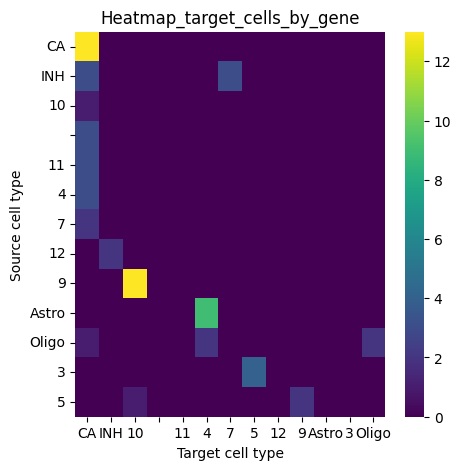

In [ ]:
troutpy.pl.sorted_heatmap(communications_ngenes.astype(float),save=False,figsize=(5,5))

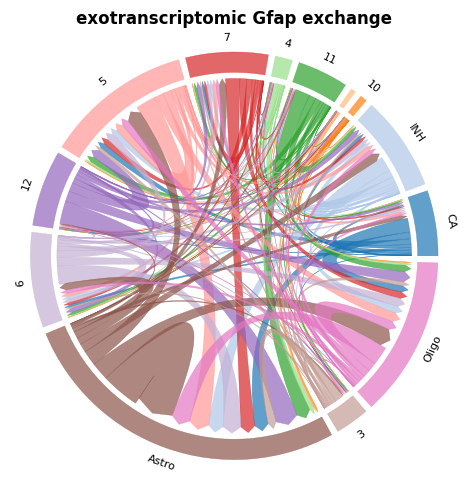

In [ ]:
# WORK ON THIS FUNCTION SINCE IT'S CURRENTLY NOT WORKING WELL
#interactions_Vxn=troutpy.tl.get_gene_interaction_strength(source_proportion, target_proportion,gene_symbol="Gfap")

/tmp/ipykernel_1020010/2393974738.py:46: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  cell_positions = pd.DataFrame(sdata['table'].obsm[spatial_key], index=sdata.table.obs[cell_id_key], columns=['x', 'y'])


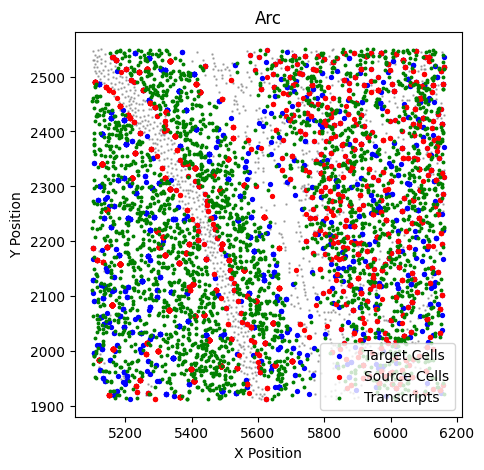

In [ ]:
troutpy.pl.spatial_interactions(sdata,layer= 'extracellular_transcripts_enriched', gene = 'Arc',gene_key= 'feature_name',figsize=(5,5))

/tmp/ipykernel_1020010/732527654.py:35: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  cell_positions = pd.DataFrame(sdata['table'].obsm[spatial_key], index=sdata.table.obs[cell_id_key], columns=['x', 'y'])


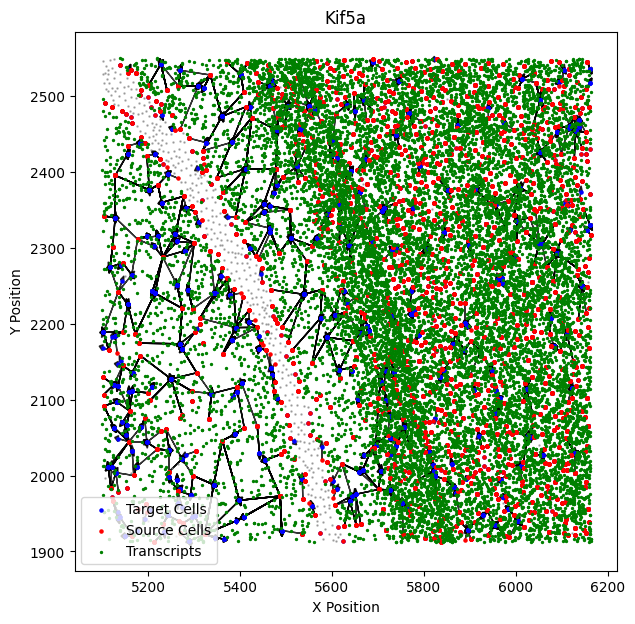

In [ ]:
troutpy.pl.interactions_with_arrows(sdata,layer= 'extracellular_transcripts_enriched', gene = 'Kif5a',gene_key= 'feature_name',figsize=(7,7),dpi=100,size=5)